# Description
Probable Name: Neris

MD5: bf08e6b02e00d2bc6dd493e93e69872f

SHA1: 5c2ba68d78471ff02adcdab12b2f82db8efe2104

SHA256: 527da5fd4e501765cdd1bccb2f7c5ac76c0b22dfaf7c24e914df4e1cb8029d71

Password of zip file: infected

Duration: 3 hours, 51 minutes and 0 seconds

VirusTotal

HybridAnalysis

RobotHash

In [1]:
import os

os.chdir(r"/home/yousinator/AuspicesAI/ScytheEx/ai")

import pandas as pd

# Define the path to your file
file_path = "data/capture20110811.pcap.netflow.labeled"

# Load the data
# Since your data appears to be tab-separated, we use sep='\s+' which handles multiple spaces
df = pd.read_csv(
    file_path,
    sep="\s+",
    skiprows=1,
    header=None,
    names=[
        "Date",
        "Flow Start",
        "Durat",
        "Prot",
        "Src_IP_Addr_Port",
        "Dir",
        "Dst_IP_Addr_Port",
        "Flags",
        "Tos",
        "Packets",
        "Bytes",
        "Flows",
        "Label",
    ],
)
df.head()

,Date,Flow Start,Durat,Prot,Src_IP_Addr_Port,Dir,Dst_IP_Addr_Port,Flags,Tos,Packets,Bytes,Flows,Label
0,2011-08-11,10:10:00.003,0.967,UDP,89.31.8.11:23929,->,147.32.84.229:13363,INT,0,2,135,1,Background
1,2011-08-11,10:10:00.003,0.967,UDP,147.32.84.229:13363,->,89.31.8.11:23929,INT,0,2,276,1,Background
2,2011-08-11,10:10:00.006,0.000,UDP,208.88.186.6:34042,->,147.32.84.229:13363,INT,0,1,62,1,Background
3,2011-08-11,10:10:00.008,0.000,UDP,92.118.218.77:55246,->,147.32.84.229:13363,INT,0,1,78,1,Background
4,2011-08-11,10:10:00.009,0.000,UDP,182.185.139.181:10223,->,147.32.84.229:13363,INT,0,1,72,1,Background


## Data Prep

### Dropping Uneeded and Unbalanced Columns

In [2]:
df.drop(["Date", "Dir", "Tos", "Flow Start"], axis=1, inplace=True)

In [3]:
from sklearn.utils import shuffle

def iteratively_balance_dataframe(df):
    # Calculate minimum size from the minority classes
    min_size = min(df["Label"].value_counts())

    # Loop until the sizes of all the unbalanced classes are reduced to close to the minimum size
    while True:
        # Calculate the number of samples in each class
        class_counts = df["Label"].value_counts()
        print("Current class distribution:")
        print(class_counts)

        # Determine if all classes are balanced within a reasonable range
        if all(class_count <= min_size * 1.1 for class_count in class_counts):
            break

        # Reduce each class by approximately 20%
        for label in class_counts.index:
            if class_counts[label] > min_size:
                # Calculate 20% of the current class count above the minimum size
                num_to_reduce = int((class_counts[label] - min_size) * 0.2)
                # Sample the rows to drop
                rows_to_drop = (
                    df[df["Label"] == label]
                    .sample(n=num_to_reduce, random_state=1)
                    .index
                )
                # Drop the rows
                df = df.drop(rows_to_drop)

        # Shuffle the dataset after modification
        
        df = shuffle(df, random_state=1)

    # Return the balanced DataFrame
    return df


# Balance the dataset
df_balanced = iteratively_balance_dataframe(df)

# Reset index for the shuffled dataset
df_balanced.reset_index(drop=True, inplace=True)

Current class distribution:
Label
Background    6071419
LEGITIMATE     225336
Botnet          54433
Name: count, dtype: int64
Current class distribution:
Label
Background    4868022
LEGITIMATE     191156
Botnet          54433
Name: count, dtype: int64
Current class distribution:
Label
Background    3905305
LEGITIMATE     163812
Botnet          54433
Name: count, dtype: int64
Current class distribution:
Label
Background    3135131
LEGITIMATE     141937
Botnet          54433
Name: count, dtype: int64
Current class distribution:
Label
Background    2518992
LEGITIMATE     124437
Botnet          54433
Name: count, dtype: int64
Current class distribution:
Label
Background    2026081
LEGITIMATE     110437
Botnet          54433
Name: count, dtype: int64
Current class distribution:
Label
Background    1631752
LEGITIMATE      99237
Botnet          54433
Name: count, dtype: int64
Current class distribution:
Label
Background    1316289
LEGITIMATE      90277
Botnet          54433
Name: count, dtype

In [4]:
print(df_balanced["Label"].value_counts())

Label
Background    59201
LEGITIMATE    54571
Botnet        54433
Name: count, dtype: int64


In [5]:
df_balanced.head()

,Durat,Prot,Src_IP_Addr_Port,Dst_IP_Addr_Port,Flags,Packets,Bytes,Flows,Label
0,0.281,TCP,147.32.84.229:2596,147.32.80.13:80,FSPA_,5,533,1,LEGITIMATE
1,0.069,TCP,147.32.84.165:1842,193.23.181.44:80,_FSA,2,122,1,Botnet
2,0.125,TCP,147.32.84.165:1040,193.23.181.44:80,FSA_,4,242,1,Botnet
3,3.605,TCP,147.32.84.25:50369,74.125.232.213:80,SPA_,11,6596,1,LEGITIMATE
4,0.000,TCP,147.32.84.165:4192,193.23.181.44:179,S_,1,62,1,Botnet


In [6]:
df_balanced.rename(columns={"Durat": "Duration", "Prot": "Protocol"}, inplace=True)

In [7]:
df_balanced

,Duration,Protocol,Src_IP_Addr_Port,Dst_IP_Addr_Port,Flags,Packets,Bytes,Flows,Label
0,0.281,TCP,147.32.84.229:2596,147.32.80.13:80,FSPA_,5,533,1,LEGITIMATE
1,0.069,TCP,147.32.84.165:1842,193.23.181.44:80,_FSA,2,122,1,Botnet
2,0.125,TCP,147.32.84.165:1040,193.23.181.44:80,FSA_,4,242,1,Botnet
3,3.605,TCP,147.32.84.25:50369,74.125.232.213:80,SPA_,11,6596,1,LEGITIMATE
4,0.000,TCP,147.32.84.165:4192,193.23.181.44:179,S_,1,62,1,Botnet
...,...,...,...,...,...,...,...,...,...
168200,0.000,TCP,147.32.84.165:1616,193.23.181.44:179,S_,1,62,1,Botnet
168201,0.000,TCP,147.32.84.59:40114,74.125.232.194:80,A_,1,66,1,LEGITIMATE
168202,0.215,TCP,147.32.84.165:1465,184.82.147.251:80,FSPA_,5,990,1,Botnet
168203,0.004,TCP,147.32.86.40:2589,147.32.192.127:443,FSPA_,7,1382,1,Background


In [8]:
def split_ip_port(ip_port):
    parts = ip_port.split(":")
    if len(parts) == 2:
        return parts[0], parts[1]  # Return IP and port
    elif len(parts) == 1:
        return parts[0], "Unknown"  # Return IP and assume no port available
    else:
        return "Unknown", "Unknown"  # Return None for both IP and port if unexpected format


# Apply the function to the 'Src_IP_Addr_Port' column
df_balanced["Source IP"], df_balanced["Source Port"] = zip(*df_balanced["Src_IP_Addr_Port"].map(split_ip_port))

# Apply the function to the 'Dst_IP_Addr_Port' column
df_balanced["Destination IP"], df_balanced["Destination Port"] = zip(
    *df_balanced["Dst_IP_Addr_Port"].map(split_ip_port)
)

# Drop the original combined columns if they are no longer needed
df_balanced.drop(["Src_IP_Addr_Port", "Dst_IP_Addr_Port"], axis=1, inplace=True)


In [9]:
df_balanced

,Duration,Protocol,Flags,Packets,Bytes,Flows,Label,Source IP,Source Port,Destination IP,Destination Port
0,0.281,TCP,FSPA_,5,533,1,LEGITIMATE,147.32.84.229,2596,147.32.80.13,80
1,0.069,TCP,_FSA,2,122,1,Botnet,147.32.84.165,1842,193.23.181.44,80
2,0.125,TCP,FSA_,4,242,1,Botnet,147.32.84.165,1040,193.23.181.44,80
3,3.605,TCP,SPA_,11,6596,1,LEGITIMATE,147.32.84.25,50369,74.125.232.213,80
4,0.000,TCP,S_,1,62,1,Botnet,147.32.84.165,4192,193.23.181.44,179
...,...,...,...,...,...,...,...,...,...,...,...
168200,0.000,TCP,S_,1,62,1,Botnet,147.32.84.165,1616,193.23.181.44,179
168201,0.000,TCP,A_,1,66,1,LEGITIMATE,147.32.84.59,40114,74.125.232.194,80
168202,0.215,TCP,FSPA_,5,990,1,Botnet,147.32.84.165,1465,184.82.147.251,80
168203,0.004,TCP,FSPA_,7,1382,1,Background,147.32.86.40,2589,147.32.192.127,443


In [10]:
engineering_df = df_balanced.copy()

In [11]:
engineering_df["Duration"] = engineering_df["Duration"].replace(0.000, 0.001)


engineering_df["Bytes per Packet"] = engineering_df.apply(
    lambda row: row["Bytes"] / row["Packets"] if row["Packets"] > 0 else 0, axis=1
)

# Calculate 'Packets per Second' and 'Bytes per Second' if duration is not zero
engineering_df["Packets per Second"] = engineering_df.apply(
    lambda row: row["Packets"] / row["Duration"] if row["Duration"] > 0 else 0, axis=1
)
engineering_df["Bytes per Second"] = engineering_df.apply(
    lambda row: row["Bytes"] / row["Duration"] if row["Duration"] > 0 else 0, axis=1
)

In [12]:
engineering_df

,Duration,Protocol,Flags,Packets,Bytes,Flows,Label,Source IP,Source Port,Destination IP,Destination Port,Bytes per Packet,Packets per Second,Bytes per Second
0,0.281,TCP,FSPA_,5,533,1,LEGITIMATE,147.32.84.229,2596,147.32.80.13,80,106.600000,17.793594,1896.797153
1,0.069,TCP,_FSA,2,122,1,Botnet,147.32.84.165,1842,193.23.181.44,80,61.000000,28.985507,1768.115942
2,0.125,TCP,FSA_,4,242,1,Botnet,147.32.84.165,1040,193.23.181.44,80,60.500000,32.000000,1936.000000
3,3.605,TCP,SPA_,11,6596,1,LEGITIMATE,147.32.84.25,50369,74.125.232.213,80,599.636364,3.051318,1829.680999
4,0.001,TCP,S_,1,62,1,Botnet,147.32.84.165,4192,193.23.181.44,179,62.000000,1000.000000,62000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168200,0.001,TCP,S_,1,62,1,Botnet,147.32.84.165,1616,193.23.181.44,179,62.000000,1000.000000,62000.000000
168201,0.001,TCP,A_,1,66,1,LEGITIMATE,147.32.84.59,40114,74.125.232.194,80,66.000000,1000.000000,66000.000000
168202,0.215,TCP,FSPA_,5,990,1,Botnet,147.32.84.165,1465,184.82.147.251,80,198.000000,23.255814,4604.651163
168203,0.004,TCP,FSPA_,7,1382,1,Background,147.32.86.40,2589,147.32.192.127,443,197.428571,1750.000000,345500.000000


In [13]:
def clean_port(port):
    try:
        # Attempt to convert port to integer
        return int(port)
    except ValueError:
        # If conversion fails, return 0
        return 0


# Clean the 'Destination Port' data
engineering_df["Destination Port"] = engineering_df["Destination Port"].apply(
    clean_port
)

engineering_df["Source Port"] = engineering_df["Source Port"].apply(
    clean_port
)

def is_encrypted_protocol(port):
    encrypted_ports = {443, 22, 993, 995, 465, 587, 636, 989, 990, 992, 1194, 500}
    return 1 if port in encrypted_ports else 0


def is_common_port(port):
    common_ports = {80, 443, 21, 22, 25, 110, 143, 3306, 3389, 5900, 53, 23}
    return 1 if port in common_ports else 0

engineering_df["Destination Port"] = engineering_df["Destination Port"].astype(int)
engineering_df["Source Port"] = engineering_df["Source Port"].astype(int)


# Apply the encryption check
engineering_df["Is Encrypted Traffic"] = engineering_df["Destination Port"].apply(
    is_encrypted_protocol
)

# Apply the common port check
engineering_df["Common Port Usage"] = engineering_df["Destination Port"].apply(
    is_common_port
)

In [14]:
engineering_df

,Duration,Protocol,Flags,Packets,Bytes,Flows,Label,Source IP,Source Port,Destination IP,Destination Port,Bytes per Packet,Packets per Second,Bytes per Second,Is Encrypted Traffic,Common Port Usage
0,0.281,TCP,FSPA_,5,533,1,LEGITIMATE,147.32.84.229,2596,147.32.80.13,80,106.600000,17.793594,1896.797153,0,1
1,0.069,TCP,_FSA,2,122,1,Botnet,147.32.84.165,1842,193.23.181.44,80,61.000000,28.985507,1768.115942,0,1
2,0.125,TCP,FSA_,4,242,1,Botnet,147.32.84.165,1040,193.23.181.44,80,60.500000,32.000000,1936.000000,0,1
3,3.605,TCP,SPA_,11,6596,1,LEGITIMATE,147.32.84.25,50369,74.125.232.213,80,599.636364,3.051318,1829.680999,0,1
4,0.001,TCP,S_,1,62,1,Botnet,147.32.84.165,4192,193.23.181.44,179,62.000000,1000.000000,62000.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168200,0.001,TCP,S_,1,62,1,Botnet,147.32.84.165,1616,193.23.181.44,179,62.000000,1000.000000,62000.000000,0,0
168201,0.001,TCP,A_,1,66,1,LEGITIMATE,147.32.84.59,40114,74.125.232.194,80,66.000000,1000.000000,66000.000000,0,1
168202,0.215,TCP,FSPA_,5,990,1,Botnet,147.32.84.165,1465,184.82.147.251,80,198.000000,23.255814,4604.651163,0,1
168203,0.004,TCP,FSPA_,7,1382,1,Background,147.32.86.40,2589,147.32.192.127,443,197.428571,1750.000000,345500.000000,1,1


In [15]:
engineering_df.drop(["Destination IP", "Source IP"], axis=1, inplace = True)

In [16]:
df = engineering_df.copy()

# Modeling

## Data Prep

In [75]:
from sklearn.preprocessing import LabelEncoder
df = engineering_df.copy()
df.to_csv("data/LogRegNeris.csv")

df["Destination Port"] = df["Destination Port"].apply(
    clean_port
)

encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ["Protocol", "Flags", "Label"]

# Apply label encoding to each column
for column in columns_to_encode:
    # Fit label encoder and return encoded labels
    df[column] = encoder.fit_transform(df[column])

In [76]:
df.drop(["Flows","Duration","Source Port","Packets"],axis=1,inplace=True)
df["Bytes"] = df["Bytes"].astype("float64")

df.to_csv("data/EncoderNeris.csv")

# df.to_csv("data/improvedNeris.csv")
print(df["Bytes"].dtype)
X = df.drop("Label", axis=1)
y = df["Label"]

float64


## Creating Model

In [85]:
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Assuming X and y are your feature and target matrices
kf = KFold(n_splits=5, shuffle=True, random_state=42)
acc = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline with scaling and logistic regression
    pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000))
    pipeline.fit(X_train, y_train)

    # Train and predict with Logistic Regression
    logreg_pred = pipeline.predict(X_test)
    logreg_model = pipeline.named_steps["logisticregression"]
    logreg_accuracy = accuracy_score(y_test, logreg_pred)
    print(f"Logistic Regression Accuracy: {logreg_accuracy * 100:.2f}%")
    acc.append(logreg_accuracy * 100)

print(f"Average Accuracy: {np.mean(acc):.2f}%")

Logistic Regression Accuracy: 77.06%
Logistic Regression Accuracy: 78.03%
Logistic Regression Accuracy: 77.68%
Logistic Regression Accuracy: 77.14%
Logistic Regression Accuracy: 77.59%
Average Accuracy: 77.50%


In [79]:
import pickle

with open("models/Neris_LogReg_model.pkl", "wb") as file:
    pickle.dump(logreg_model, file)

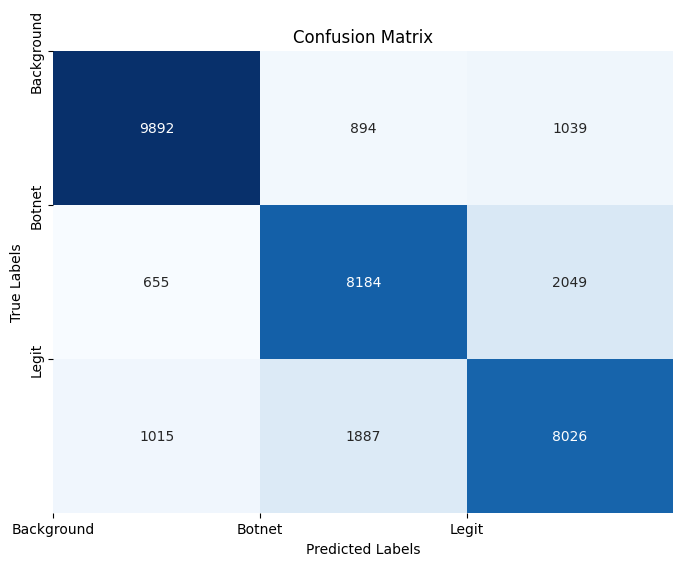

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, logreg_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0, 1, 2], labels=["Background", "Botnet", "Legit"])
plt.yticks(ticks=[0, 1, 2], labels=["Background", "Botnet", "Legit"])
plt.show()

In [88]:
engineering_df["Flags"].value_counts()

Flags
INT       47352
S_        31165
PA_       23761
A_        20876
SPA_       9823
FSPA_      7356
FA_        7300
_FSPA      7051
RA_        3397
FPA_       2796
SA_        2734
FSA_       1032
SRA_        554
_FSA        509
FSRPA_      453
SRPA_       369
URP         332
FSRA_       257
FRA_        234
R_          176
URH         166
FRPA_       113
_FSRPA       84
RED          57
RPA_         49
ECO          48
TXD          39
URN          25
SR_          24
FS_          15
URFIL        15
CON          12
URHPRO       11
ECR          11
NNS           3
URF           2
_FSRA         1
FPAC_         1
SEC_          1
PAC_          1
Name: count, dtype: int64